In [1]:
import os
import tensorflow as tf

# Force TensorFlow to use GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Set memory growth to prevent TensorFlow crashes
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU is set up correctly!")
    except RuntimeError as e:
        print(e)

# Confirm GPU is being used
print("Available GPUs:", tf.config.list_physical_devices('GPU'))


✅ GPU is set up correctly!
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print(f"Training Data shape: {x_train.shape}")
print(f"Training Data shape: {x_test.shape}")


Training Data shape: (60000, 28, 28)
Training Data shape: (10000, 28, 28)


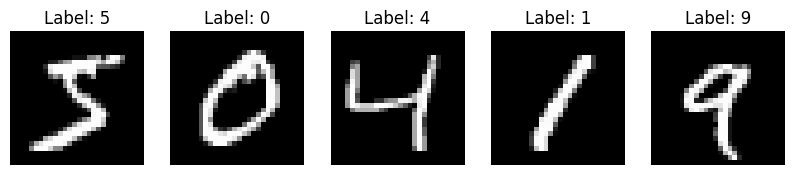

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(10,3))
for i in range (5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis("off")

plt.show()

In [5]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test/ 255.0

# Reshape the images to add a single color channel (for compatibility with CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Print new shape
print(f"New Training Data Shape: {x_train.shape}")
print(f"New Testing Data Shape: {x_test.shape}")

New Training Data Shape: (60000, 28, 28, 1)
New Testing Data Shape: (10000, 28, 28, 1)


In [23]:
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Min pixel value: 0.0
Max pixel value: 1.0


In [6]:
from tensorflow.keras import models, layers


In [7]:
model = models.Sequential()

In [8]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))


In [9]:
model.add(layers.MaxPooling2D((2,2)))

In [10]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [11]:
model.add(layers.MaxPooling2D((2,2)))


In [12]:
model.add(layers.Flatten())

In [13]:
model.add(layers.Dense(128, activation='relu'))


In [14]:
model.add(layers.Dense(10, activation='softmax')) 

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [19]:
history = model.fit(x_train, y_train, epochs=10, batch_size=8, validation_data=(x_test, y_test))


Epoch 1/10
7500/7500 [==============================] - 17s 2ms/step - loss: 0.0988 - accuracy: 0.9686 - val_loss: 0.0397 - val_accuracy: 0.9869
Epoch 2/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0374 - accuracy: 0.9890 - val_loss: 0.0338 - val_accuracy: 0.9895
Epoch 3/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0331 - val_accuracy: 0.9892
Epoch 4/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0397 - val_accuracy: 0.9898
Epoch 5/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 6/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0418 - val_accuracy: 0.9906
Epoch 7/10
7500/7500 [==============================] - 19s 2ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0468 - val_ac

In [20]:
# Evaluate model on test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")


313/313 - 1s - loss: 0.0632 - accuracy: 0.9902 - 819ms/epoch - 3ms/step

✅ Test Accuracy: 99.02%
📉 Test Loss: 0.0632


313/313 [==============================] - 1s 2ms/step


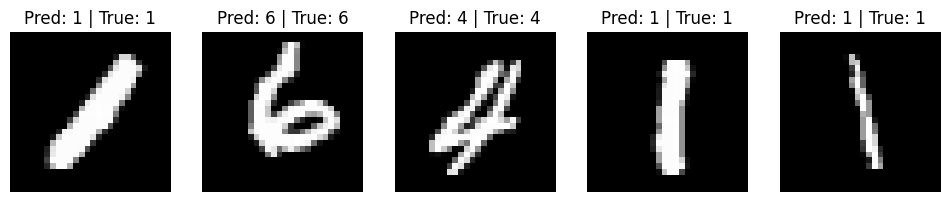

In [21]:
import numpy as np

# Make predictions on test dataset
predictions = model.predict(x_test)

# Select a few random samples to visualize predictions
num_samples = 5
indices = np.random.choice(len(x_test), num_samples)

fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))

for i, idx in enumerate(indices):
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[idx])
    true_label = y_test[idx]
    axes[i].set_title(f"Pred: {predicted_label} | True: {true_label}")
    axes[i].axis("off")

plt.show()


313/313 [==============================] - 0s 1ms/step


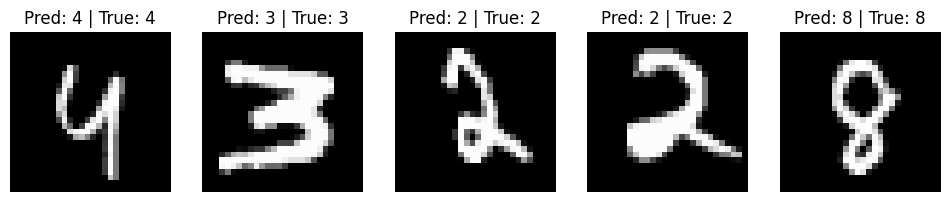

In [24]:
import numpy as np

# Make predictions on test dataset
predictions = model.predict(x_test)

# Select a few random samples to visualize predictions
num_samples = 5
indices = np.random.choice(len(x_test), num_samples)

fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))

for i, idx in enumerate(indices):
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[idx])
    true_label = y_test[idx]
    axes[i].set_title(f"Pred: {predicted_label} | True: {true_label}")
    axes[i].axis("off")

plt.show()


In [26]:
# Save the trained model
model.save("mnist_model.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [27]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("mnist_model.h5")

# Evaluate the loaded model to ensure it's the same
loaded_loss, loaded_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Loaded Model Accuracy: {loaded_acc * 100:.2f}%")


313/313 - 1s - loss: 0.0632 - accuracy: 0.9902 - 658ms/epoch - 2ms/step

✅ Loaded Model Accuracy: 99.02%


In [28]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TFLite model
with open("mnist_model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model converted to TFLite and saved!")


INFO:tensorflow:Assets written to: C:\Users\aliza\AppData\Local\Temp\tmpc4fc95yk\assets


INFO:tensorflow:Assets written to: C:\Users\aliza\AppData\Local\Temp\tmpc4fc95yk\assets


✅ Model converted to TFLite and saved!


In [29]:
import os

# Get file size of the converted model
model_size = os.path.getsize("mnist_model.tflite") / 1024  # Convert bytes to KB
print(f"✅ TFLite Model Size: {model_size:.2f} KB")


✅ TFLite Model Size: 882.36 KB
